# Hypothesis Tests

## Typical Analysis Procedure

* Visually inspect the data
* Find extreme samples, and check them carefully
* Determine the data-type of the values
* If the data are continuous, check whether or not they are normally distributed
* Select and apply the appropriate test, or start with the model-based analysis of the data

### example

Assume that you are running a private educational institution. If your students score $110$ in the final exam, where the national average is 100, you get a bonus. When the results are significantly lower, you loose your bonus, and you have to hire more teachers; and when the results are significantly higher, you also loose your bonus (because you have spent too much money on teachers), and you have to cut back on the number of teachers.
* The final exam of your ten students produce the following scores 

In [3]:
import numpy as np

scores = np.array([109.4, 76.2, 128.7, 93.7, 85.6, 117.7, 117.2, 87.3, 100.3, 55.1]) # 10 scores
np.mean(scores)

97.11999999999999

* Plot the students scores

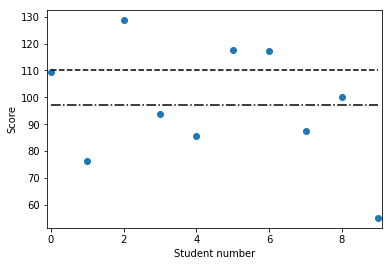

In [23]:
import matplotlib.pyplot as plt

plt.scatter(np.arange(len(scores)),scores)
x=np.arange(len(scores))

begin=x[0]
end=x[-1]

plt.hlines(110, begin, end, linestyles='dashed')
plt.hlines(np.mean(scores), begin, end, linestyles='dashdot')
plt.xlim(begin-0.1, end+0.1)
plt.xlabel( "Student number" )
plt.ylabel( "Score" )
plt.show( )

* Is the mean value of the scores ($97.1$) significantly different from $110$?

A normality test (stats.normaltest(scores)) indicates that the data are probably taken from a normal distribution.
* We know that the normalized difference between sample and the population mean, the  t-statistic, follows the  t-distribution.
$$ t=\frac{\bar{x}-\mu}{s/\sqrt(n)}$$

The difference between our sample mean and the value we want to compare it to is

In [27]:
tn=np.mean(scores) - 110
tn

-12.88000000000001

Normalized by the sample standard error, is given by tval

We can calculate the likelihood that we obtain a t-statistic satisfying |t| > 1.84 → we use the survival function

In [31]:
from scipy import stats 

tval = -tn/stats.sem(scores)
td=stats.t(len(scores)-1) # "frozen" t-distribution
p=2*td.sf(tval)
print (tval,p)

1.836024999781543 0.09953843652790623


Since the t-distribution is a known curve that depends only on the number of samples, and we can calculate the likelihood that we obtain a t-statistic of $|t|>1.84$.
* The factor $2$ in the last line of the code is required, since we have to combine the probability of $t < -1.84$ and $t > 1.84$. 

We can state that the likelihood that the population mean is $110$ is $9.95 %$. But since a statistical difference is only given by convention if the likelihood is less than $5 %$, we conclude that the observed value of $97.1$ is not significantly different from $110$, and the bonus has to be paid out.

## Generalization. Statistical Inference

* A random sample is drawn from a population. (In our example, the random sample is our scores)
* A null hypothesis is formulated. (“There is null difference between the population mean and the value of $110$”)
* A test-statistic is calculated, of which we know the probability distribution. (Here the sample mean, since we know that the mean value of samples from a normal distribution follows the t-distribution.)
* Comparing the observed value of the statistic (here the obtained t-value) with the corresponding distribution (the t-distribution), we can find the likelihood that a value as extreme as or more extreme than the observed one is found by chance. This is the so-called <b>p-value</b>.
* If the p-value is $p < 0.05$, we reject the null hypothesis, and speak of a statistically significant difference. If a value of $p < 0.001$ is obtained, the result is typically called highly significant.

In other words, the p-value states how likely it is to obtain a value as extreme or
more extreme by chance alone, if the null hypothesis is true.<br>
The value against which the p-value is compared is the significance level, and is
often indicated with the letter  ̨$\alpha$. The significance level is a user choice, and typically
set to $0.05$.

## Distribution of a Sample Mean

To check the mean value of normally distributed data against a reference value, we
typically use the one sample t-test, which is based on the t-distribution.


In practice we have to estimate the mean and standard deviation from the sample; and the t-distribution, which characterizes the distribution of sample means for normally distributed data, deviates slightly from the normal distribution.

### Example

We take $100$ normally distributed data, with a mean of $7$ and with a standard deviation of $3$.
* What is the chance of finding a mean value at a distance of $0.5$ or more from the mean?

We have a population, with a mean value of 7 and a standard deviation of 3.

In [39]:
import numpy as np  
from scipy import stats

mean = 7
std = 3

nd = stats.norm(mean,std)

From that population an observer takes 100 random samples

In [41]:
sample=nd.rvs(100)

The sample mean of the example is $7.06$, close to but different from the real mean

In [44]:
sample_mean = np.mean(sample)

print(('The sample mean is {0:4.2f}.'.format( sample_mean)))

The sample mean is 6.83.


The following gives the observer an idea about the variability of the population.

In [46]:
sample_std= np.std(sample,ddof=1) # Delta Degrees of Freedom. The divisor used in calculations is N - ddof, where N represents the number of elements. By default ddof is zero

print((' The sample standard deviation is {0:4.2f}.'.format(sample_std))) 

 The sample standard deviation is 2.92.


In [47]:
sample_sem =stats.sem(sample) #std error of the mean

print((' The sample standard error of the mean is {0:4.2f}.'.format(sample_sem)))

 The sample standard error of the mean is 0.29.
